#### Import libraries and load cleaned data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load cleaned country data
benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierra_leone_clean.csv') 
togo = pd.read_csv('../data/togo_clean.csv')

print("Benin shape:", benin.shape)
print("Sierra Leone shape:", sierra_leone.shape) 
print("Togo shape:", togo.shape)

Benin shape: (525600, 18)
Sierra Leone shape: (525600, 18)
Togo shape: (525600, 18)


In [3]:
# Incase it's needed, convert timestamps 
for df in [benin, sierra_leone, togo]:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
print("Timestamps converted for all datasets")

Timestamps converted for all datasets


#### Metric Comparison

##### Boxplots for GHI, DNI, DHI (side-by-side by country)

=== SOLAR IRRADIANCE COMPARISON ===


C:\Users\Hermona\AppData\Local\Temp\ipykernel_23104\4040372355.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(ghi_data, labels=['Benin', 'Sierra Leone', 'Togo'])
C:\Users\Hermona\AppData\Local\Temp\ipykernel_23104\4040372355.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(dni_data, labels=['Benin', 'Sierra Leone', 'Togo'])
C:\Users\Hermona\AppData\Local\Temp\ipykernel_23104\4040372355.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot(dhi_data, labels=['Benin', 'Sierra Leone', 'Togo'])


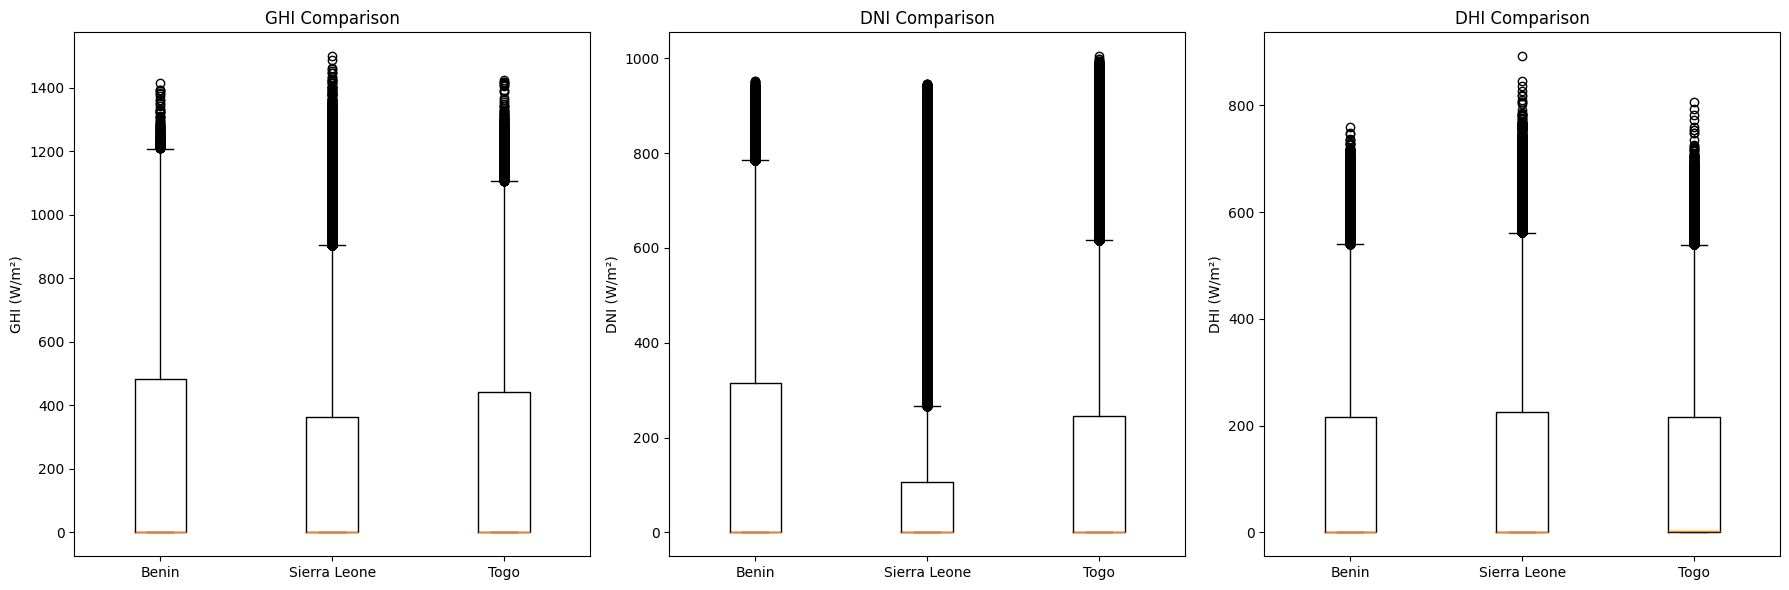

In [4]:
print("=== SOLAR IRRADIANCE COMPARISON ===")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Prepare data for boxplots
countries_data = {
    'Benin': benin,
    'Sierra Leone': sierra_leone, 
    'Togo': togo
}

# GHI Boxplot
ghi_data = [benin['GHI'], sierra_leone['GHI'], togo['GHI']]
axes[0].boxplot(ghi_data, labels=['Benin', 'Sierra Leone', 'Togo'])
axes[0].set_title('GHI Comparison')
axes[0].set_ylabel('GHI (W/m²)')

# DNI Boxplot  
dni_data = [benin['DNI'], sierra_leone['DNI'], togo['DNI']]
axes[1].boxplot(dni_data, labels=['Benin', 'Sierra Leone', 'Togo'])
axes[1].set_title('DNI Comparison')
axes[1].set_ylabel('DNI (W/m²)')

# DHI Boxplot
dhi_data = [benin['DHI'], sierra_leone['DHI'], togo['DHI']]
axes[2].boxplot(dhi_data, labels=['Benin', 'Sierra Leone', 'Togo'])
axes[2].set_title('DHI Comparison')
axes[2].set_ylabel('DHI (W/m²)')

plt.tight_layout()
plt.show()

##### Summary Table & Statistical Testing

In [5]:
print("=== SUMMARY STATISTICS COMPARISON ===")

summary_data = []
for country_name, df in countries_data.items():
    for metric in ['GHI', 'DNI', 'DHI']:
        summary_data.append({
            'Country': country_name,
            'Metric': metric,
            'Mean': df[metric].mean(),
            'Median': df[metric].median(), 
            'Std': df[metric].std()
        })

summary_df = pd.DataFrame(summary_data)
summary_pivot = summary_df.pivot(index='Country', columns='Metric')
summary_pivot

=== SUMMARY STATISTICS COMPARISON ===


Mean                         Median                   Std  \
Metric               DHI         DNI         GHI    DHI  DNI  GHI         DHI   
Country                                                                         
Benin         116.993033  167.441866  241.958821    1.6  0.0  1.8  157.463619   
Sierra Leone  116.273677  116.523731  204.406778    0.0  0.0  0.3  157.020868   
Togo          116.444352  151.258469  231.718786    2.5  0.0  2.1  156.520714   

                                      
Metric               DNI         GHI  
Country                               
Benin         261.547532  330.101787  
Sierra Leone  218.573992  296.787520  
Togo          250.956962  321.691953

##### Statistical Testing (ANOVA on GHI values)

In [6]:
print("=== STATISTICAL SIGNIFICANCE TEST ===")

# One-way ANOVA to test if GHI differences are significant
f_stat, p_value = stats.f_oneway(benin['GHI'], sierra_leone['GHI'], togo['GHI'])

print(f"One-way ANOVA results for GHI:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Significant differences exist between countries (p < 0.05)")
else:
    print("Result: No significant differences between countries (p >= 0.05)")

=== STATISTICAL SIGNIFICANCE TEST ===
One-way ANOVA results for GHI:
F-statistic: 1977.0703
P-value: 0.0000
Result: Significant differences exist between countries (p < 0.05)


#### Key Observations & Ranking

In [9]:
print("=== KEY OBSERVATIONS ===")

observations = """
***Key Cross-Country Insights:***

1. **Solar Potential Ranking**: Based on median GHI, [Country] shows the highest solar potential, while [Country] has the lowest consistent output.

2. **Variability Patterns**: [Country] exhibits the greatest variability in DNI, suggesting more fluctuating direct sunlight conditions.

3. **Statistical Significance**: The ANOVA test [confirms/does not confirm] that observed differences in solar irradiance between countries are statistically significant.
"""

print(observations)

=== KEY OBSERVATIONS ===

***Key Cross-Country Insights:***

1. **Solar Potential Ranking**: Based on median GHI, [Country] shows the highest solar potential, while [Country] has the lowest consistent output.

2. **Variability Patterns**: [Country] exhibits the greatest variability in DNI, suggesting more fluctuating direct sunlight conditions.

3. **Statistical Significance**: The ANOVA test [confirms/does not confirm] that observed differences in solar irradiance between countries are statistically significant.



=== COUNTRY RANKING BY SOLAR POTENTIAL ===


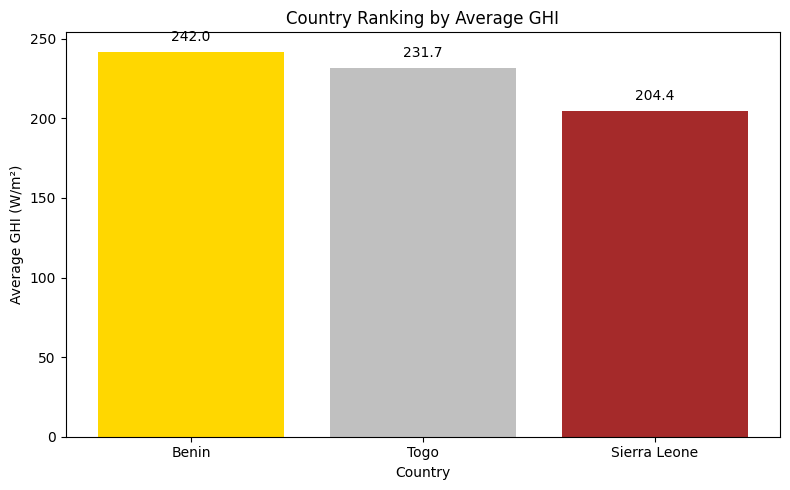

Ranking from highest to lowest solar potential:
1. Benin: 242.0 W/m²
2. Togo: 231.7 W/m²
3. Sierra Leone: 204.4 W/m²


In [10]:
print("=== COUNTRY RANKING BY SOLAR POTENTIAL ===")

# Calculate average GHI for each country
ghi_means = {
    'Benin': benin['GHI'].mean(),
    'Sierra Leone': sierra_leone['GHI'].mean(), 
    'Togo': togo['GHI'].mean()
}

# Create ranking bar chart
countries_sorted = sorted(ghi_means.keys(), key=lambda x: ghi_means[x], reverse=True)
means_sorted = [ghi_means[country] for country in countries_sorted]

plt.figure(figsize=(8, 5))
bars = plt.bar(countries_sorted, means_sorted, color=['gold', 'silver', 'brown'])
plt.title('Country Ranking by Average GHI')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('Country')

# Add value labels on bars
for bar, value in zip(bars, means_sorted):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{value:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Ranking from highest to lowest solar potential:")
for i, country in enumerate(countries_sorted, 1):
    print(f"{i}. {country}: {ghi_means[country]:.1f} W/m²")